In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
data = pd.read_csv('data/Nat_Gas.csv', parse_dates=['Dates'])

data.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_75500\455137120.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('data/Nat_Gas.csv', parse_dates=['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [4]:
# Display basic statistics
data.describe()

,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


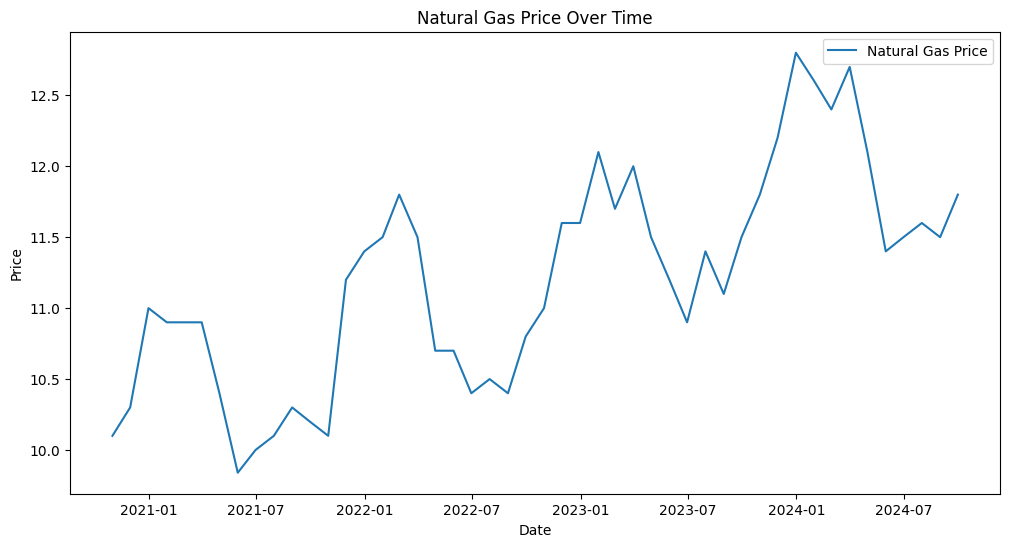

In [5]:
# Plotting price curve
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], label='Natural Gas Price')
plt.title('Natural Gas Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


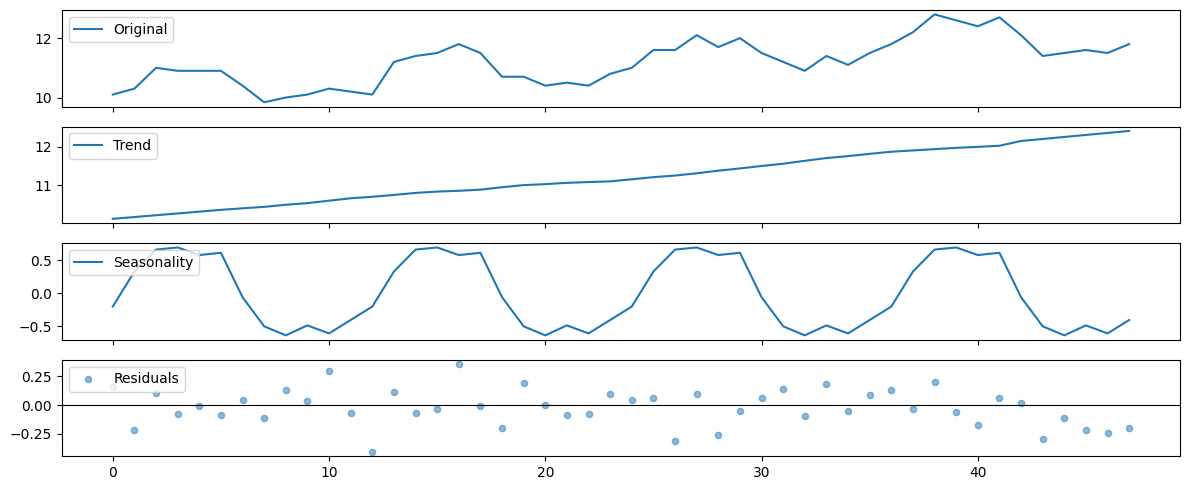

In [25]:
# Decompose the time series and plot the components
decomposition = seasonal_decompose(data['Prices'], model='additive', period=12, extrapolate_trend='freq')

def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(12, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].scatter(decomposition.resid.index, decomposition.resid.values, 
                   marker='o', s=20, alpha=0.5, label='Residuals')
    axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[3].legend(loc='upper left')
    plt.tight_layout()
    plt.show()

seas_decomp_plots(data['Prices'], decomposition)

In [9]:
# Check for stationarity
result = adfuller(data['Prices'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.21807686170000096
p-value: 0.9732574388448694


In [14]:
# Train-test split
train_size = int(len(data) * 0.8)
train, test = data["Prices"][:train_size], data["Prices"][train_size:]
print(f'Train size: {len(train)}, Test size: {len(test)}')


Train size: 38, Test size: 10


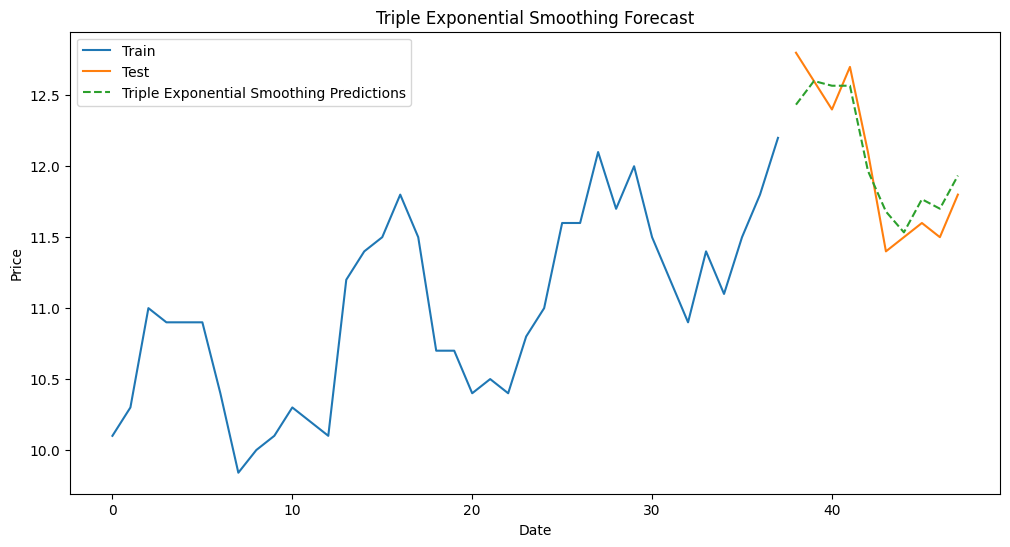

In [23]:
# Smoothing Methods - Triple Exponential Smoothing
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=12).fit(optimized=True)

triple_preds = triple.forecast(len(test))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, triple_preds, label='Triple Exponential Smoothing Predictions', linestyle='--')
plt.title('Triple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Calculate MSE for Triple Exponential Smoothing
triple_mse = mean_squared_error(test, triple_preds)
print("MSE: ", triple_mse)


MSE:  0.036334441077407756
